In [1]:
import os
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation, Reshape, Concatenate
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.models import Model as KerasModel

Using TensorFlow backend.


In [2]:
def my_model(X_train,Y_train,x_1,x_2,x_3,x_4,x_5,y_1):
    # embedding
    input_month = keras.Input(shape=(1,),name="input_month")
    output_month= layers.Embedding(x_1, 6, name='month_embedding')(input_month)
    output_month= layers.Reshape(target_shape=(6,))(output_month)
    
    input_day    = keras.Input(shape=(1,),name="input_day")
    output_day   = layers.Embedding(x_2, 10, name='day_embedding')(input_day)
    output_day   = layers.Reshape(target_shape=(10,))(output_day)
    
    input_dow    = keras.Input(shape=(1,),name="input_dow")
    output_dow   = layers.Embedding(x_3, 6, name='dow_embedding')(input_dow)
    output_dow   = layers.Reshape(target_shape=(6,))(output_dow)
    
    input_time   = keras.Input(shape=(1,),name="input_time")
    output_time  = layers.Embedding(x_4, 20, name='time_embedding')(input_time)
    output_time  = layers.Reshape(target_shape=(20,))(output_time)
    
    input_crime  = keras.Input(shape=(x_5,),name="input_crime")
    
    # DNN 
    output_model = layers.Concatenate()([output_month, output_day, output_dow, output_time, input_crime])    
    output_model = layers.Dense(16, activation='relu',name="hidden1")(output_model)
    #output_model = layers.Dense(16, activation='relu',name="hidden2")(output_model)
    output_model = layers.Dense(y_1, activation='softmax',name="output_layer")(output_model)

    model = keras.Model(inputs=[input_month, input_day, input_dow, input_time, input_crime],
                        outputs=output_model)

    model.compile(optimizer="adam",
                  loss='mean_absolute_error',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=100,
                   validation_split=0.3,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)],
                   epochs=100,
                   verbose=1,
                   shuffle=True)
    
    return hist,model

def model_summary(model):
    model.summary()
    
def grapviz(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    return plt.show()

In [3]:
# embedding후 dnn
folder="preprossed"
subdir_names=os.listdir(folder)

histL=[]
modelL=[]
for file_name in subdir_names:
    if file_name=="BRONXW.csv":
        continue
    input_X=[]
    y=[]
    csv=pd.read_csv(folder+"\\"+file_name) 
    
    # x_train, y 구성
    for col in ["month","day","dow","time"]:
        tempL=np.expand_dims(csv[col].as_matrix(), axis=-1)
        input_X.append(tempL)
    input_X.append(np.array(pd.get_dummies(csv.crime_code)))
    y=np.array(pd.get_dummies(csv.street))
    
    hist,model=my_model(input_X,y,12,31,7,24,7,y[0].size)
    histL.append(hist)
    modelL.append(model)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Train on 70189 samples, validate on 30081 samples
Epoch 1/100
70189/70189 [==============================] - 3s 40us/sample - loss: 0.2886 - accuracy: 0.4372 - val_loss: 0.2746 - val_accuracy: 0.4510
Epoch 2/100
70189/70189 [==============================] - 1s 20us/sample - loss: 0.2732 - accuracy: 0.4536 - val_loss: 0.2745 - val_accuracy: 0.4510
Epoch 3/100
70189/70189 [==============================] - 1s 21us/sample - loss: 0.2732 - accuracy: 0.4536 - val_loss: 0.2745 - val_accuracy: 0.4510
Epoch 4/100
70189/70189 [==============================] - 2s 23us/sample - loss: 0.2732 - accuracy: 0.4536 - val_loss: 0.2745 - val_accuracy: 0.4510
Epoch 5/100
70189/70189 [==============================] - 2s 22us/sample - loss: 0.2732 - accuracy: 0.4536 - val_loss: 0.2750 - val_accuracy: 0.4522
Epoch 6/100
70189/70189 [==============================] - 1s 21us/sample - loss: 0.2728 - accuracy: 0.4546 - val_loss: 0.2751 - val_accuracy: 0.4499
Epoch 7/100
70189/70189 [=========================

C:\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Train on 58455 samples, validate on 25053 samples
Epoch 1/100
58455/58455 [==============================] - 2s 38us/sample - loss: 0.3329 - accuracy: 0.3534 - val_loss: 0.3137 - val_accuracy: 0.3769
Epoch 2/100
58455/58455 [==============================] - 1s 21us/sample - loss: 0.3170 - accuracy: 0.3684 - val_loss: 0.3114 - val_accuracy: 0.3788
Epoch 3/100
58455/58455 [==============================] - 1s 20us/sample - loss: 0.3156 - accuracy: 0.3701 - val_loss: 0.3107 - val_accuracy: 0.3795
Epoch 4/100
58455/58455 [==============================] - 1s 20us/sample - loss: 0.3151 - accuracy: 0.3710 - val_loss: 0.3104 - val_accuracy: 0.3803
Epoch 5/100
58455/58455 [==============================] - 1s 20us/sample - loss: 0.3146 - accuracy: 0.3718 - val_loss: 0.3104 - val_accuracy: 0.3802
Epoch 6/100
58455/58455 [==============================] - 1s 20us/sample - loss: 0.3142 - accuracy: 0.3726 - val_loss: 0.3106 - val_accuracy: 0.3794
Epoch 7/100
58455/58455 [=========================

C:\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Train on 47436 samples, validate on 20330 samples
Epoch 1/100
47436/47436 [==============================] - 2s 41us/sample - loss: 0.4148 - accuracy: 0.5995 - val_loss: 0.4006 - val_accuracy: 0.6000
Epoch 2/100
47436/47436 [==============================] - 1s 20us/sample - loss: 0.3982 - accuracy: 0.6018 - val_loss: 0.4000 - val_accuracy: 0.6000
Epoch 3/100
47436/47436 [==============================] - 1s 19us/sample - loss: 0.3978 - accuracy: 0.6021 - val_loss: 0.3997 - val_accuracy: 0.6006
Epoch 4/100
47436/47436 [==============================] - 1s 20us/sample - loss: 0.3946 - accuracy: 0.6066 - val_loss: 0.3953 - val_accuracy: 0.6075
Epoch 5/100
47436/47436 [==============================] - 1s 20us/sample - loss: 0.3898 - accuracy: 0.6117 - val_loss: 0.3939 - val_accuracy: 0.6071
Epoch 6/100
47436/47436 [==============================] - 1s 19us/sample - loss: 0.3880 - accuracy: 0.6133 - val_loss: 0.3933 - val_accuracy: 0.6069
Epoch 7/100
47436/47436 [=========================

In [4]:
# BRONXW
def my_model_BRONXW(X_train,Y_train,x_1,x_2,x_3,x_4,x_5,y_1):
    # embedding
    input_month = keras.Input(shape=(1,),name="input_month")
    output_month= layers.Embedding(x_1, 6, name='month_embedding')(input_month)
    output_month= layers.Reshape(target_shape=(6,))(output_month)
    
    input_day    = keras.Input(shape=(1,),name="input_day")
    output_day   = layers.Embedding(x_2, 10, name='day_embedding')(input_day)
    output_day   = layers.Reshape(target_shape=(10,))(output_day)
    
    input_dow    = keras.Input(shape=(1,),name="input_dow")
    output_dow   = layers.Embedding(x_3, 6, name='dow_embedding')(input_dow)
    output_dow   = layers.Reshape(target_shape=(6,))(output_dow)
    
    input_time   = keras.Input(shape=(1,),name="input_time")
    output_time  = layers.Embedding(x_4, 20, name='time_embedding')(input_time)
    output_time  = layers.Reshape(target_shape=(20,))(output_time)
    
    input_crime  = keras.Input(shape=(x_5,),name="input_crime")
    
    # DNN 
    output_model = layers.Concatenate()([output_month, output_day, output_dow, output_time, input_crime])    
    output_model = layers.Dense(16, activation='relu',name="hidden1")(output_model)
    #output_model = layers.Dense(16, activation='relu',name="hidden2")(output_model)
    output_model = layers.Dense(y_1, activation='sigmoid',name="output_layer")(output_model)

    model = keras.Model(inputs=[input_month, input_day, input_dow, input_time, input_crime],
                        outputs=output_model)

    model.compile(optimizer="adam",
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # starts training
    hist=model.fit(X_train,Y_train,
                   batch_size=100,
                   validation_split=0.3,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=40)],
                   epochs=100,
                   verbose=1,
                   shuffle=True)
    
    return hist,model

# embedding후 dnn
folder="preprossed"
file_name="BRONXW.csv"
input_X=[]
y=[]
csv=pd.read_csv(folder+"\\"+file_name) 

# x_train, y 구성
for col in ["month","day","dow","time"]:
    tempL=np.expand_dims(csv[col].as_matrix(), axis=-1)
    input_X.append(tempL)
input_X.append(np.array(pd.get_dummies(csv.crime_code)))
for i in range(len(csv)):
    if csv["street"][i]==4:
        y.append([0])
    else:
        y.append([1])
y=np.array(y)

hist,model=my_model_BRONXW(input_X,y,12,31,7,24,7,y[0].size)
histL.append(hist)
modelL.append(model)



C:\anaconda\lib\site-packages\ipykernel_launcher.py:55: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 53130 samples, validate on 22770 samples
Epoch 1/100
53130/53130 [==============================] - 2s 46us/sample - loss: 0.4148 - accuracy: 0.8675 - val_loss: 0.3961 - val_accuracy: 0.8650
Epoch 2/100
53130/53130 [==============================] - 1s 21us/sample - loss: 0.3892 - accuracy: 0.8675 - val_loss: 0.3955 - val_accuracy: 0.8650
Epoch 3/100
53130/53130 [==============================] - 1s 21us/sample - loss: 0.3890 - accuracy: 0.8675 - val_loss: 0.3954 - val_accuracy: 0.8650
Epoch 4/100
53130/53130 [==============================] - 1s 21us/sample - loss: 0.3890 - accuracy: 0.8675 - val_loss: 0.3962 - val_accuracy: 0.8650
Epoch 5/100
53130/53130 [==============================] - 1s 22us/sample - loss: 0.3889 - accuracy: 0.8675 - val_loss: 0.3969 - val_accuracy: 0.8650
Epoch 6/100
53130/53130 [==============================] - 1s 23us/sample - loss: 0.3888 - accuracy: 0.8675 - val_loss: 0.3957 - val_accuracy: 0.8650
Epoch 7/100
53130/53130 [=========================

Model: "BROOKLYN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 1)]          0                                            
___________________________________________________________________________________________

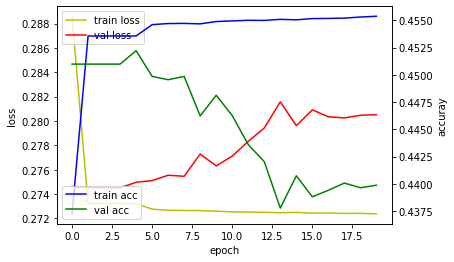

Model: "MANHATTAN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________

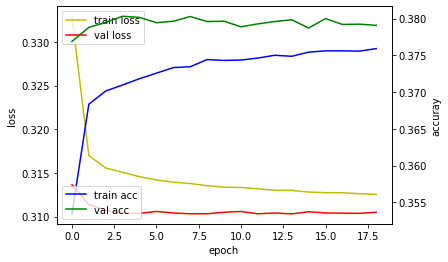

Model: "QUEENS"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 1)]          0                                            
_____________________________________________________________________________________________

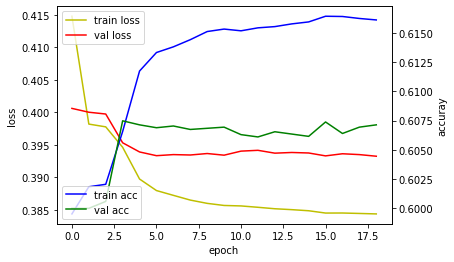

Model: "BRONX"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_month (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_day (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_dow (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_time (InputLayer)         [(None, 1)]          0                                            
______________________________________________________________________________________________

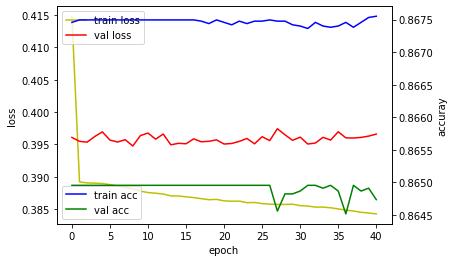

In [5]:
modelName=["BROOKLYN","MANHATTAN","QUEENS","BRONX"]
for i in range(4):
    modelL[i]._name=modelName[i]
    model_summary(modelL[i])
    grapviz(histL[i])